# Machine Learning Engineer Nanodegree Capstone Project

In [1]:
# Import libraries necessary for this project
import py_compile
py_compile.compile("functions.py")
import functions as fn
import visuals as vs
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
from sklearn.preprocessing import MinMaxScaler

# Pretty display for notebooks
%matplotlib inline

In [2]:
#Import data from file
data = pd.read_csv('C:/Users/mrandjic/OneDrive - Telenor Serbia/Projects/capstone/roaming_add_on_dataset.txt', sep="\t")

#Convert TIME_ID to dates, in order to make dates manupulation easier
data['TIME_ID'] = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in data['TIME_ID']]

In [3]:
#Display the first row
display(data.head(n=1))

,TIME_ID,SERVICE_SEG,AP_NAME,ACT_MONTH,ACT_VOL,REV,NUM_OF_MONTHS,VOICE_VPN_MIN,VOICE_ONNET_MIN,VOICE_OFFNET_MIN,VOICE_INT_MIN,SMS_NAT,SMS_INT,GPRS_NAT_MB,MF_REV,US_REV,OS,FLAG,SUBSCRIPTION_ID
1,2017-07-01,Si,Travel Sure 10,7,59.584375,858.846875,2,58.046875,153.715625,279.565625,1.228125,94.0625,2.8125,3378.146875,2602.34375,1259.478125,iPhone,NO_TARGET,2907


# Data exploration part

In this part, we want to perform some descriptive statistics techniques, in order to get familliar with dataset.

In [4]:
#Display total number of records
n_records = data.shape[0]

#Display total number of no takers, users that did not buy roaming add-on
n_no_takers = data[(data.FLAG == "NO_TARGET")].shape[0]

#Display total number of takers, users that bought roaming add-on
n_takers = data[(data.FLAG == "TARGET")].shape[0]

# Print the results
print("Total number of records: {}".format(n_records))

#Print total numer of roaming users that didn't buy add-on
print("Total number of no takers: {}".format(n_no_takers))

#Print total numer of roaming users that bought add-on
print("Total number of takers: {}".format(n_takers))

Total number of records: 367869
Total number of no takers: 353087
Total number of takers: 14782


As we can see from results above, around 4% of database contains users that have activated the add-on service in time span of 16 months. 96% of users that have been in roaming did not activated this add-on.

In code cell below, total number of users per month is shown, in order to check for seasonality in number of roaming users and activations of add-on service per month.

This graph shows seasonality patterns among both groups in dataset. We clearly see that during summer months, number of roaming users is higher (especially during July and August), comparing to other months presented in dataset. Users who have activated the service are more likely to buy it in March, June, July, November and December. This actually makes sense, because users travel more frequently during these months for e.g. vacation reasons.

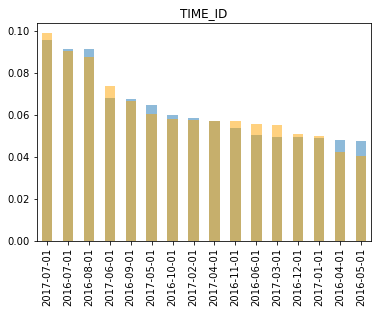

In [5]:
data[(data.FLAG == "NO_TARGET")]['TIME_ID'].value_counts(normalize=True, sort=True).plot(kind='bar',alpha=0.5,title='TIME_ID')
data[(data.FLAG == "TARGET")]['TIME_ID'].value_counts(normalize=True, sort=True).plot(kind='bar',alpha=0.5, color="orange", title='TIME_ID')

This graph shows which users are more likely to buy add-on regarding OS they run on their mobile phones. It seems that iPhone and Blackberry users are more likely to activate this add-on comparing to other groups.

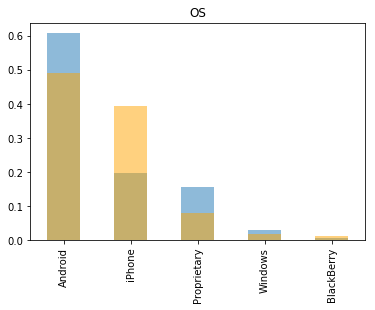

In [75]:
data[(data.FLAG == "NO_TARGET")]['OS'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, title='OS')
data[(data.FLAG == "TARGET")]['OS'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color="orange", title='OS')

This graph shows that users from Go(Gold) segment are more likely to activate roaming add-on, comparing to other segments. Users who belong to Go segment are more valuable ones (they pay higher for the mobile services), so it is expected from them to be more rational when using mobile services in roaming. 

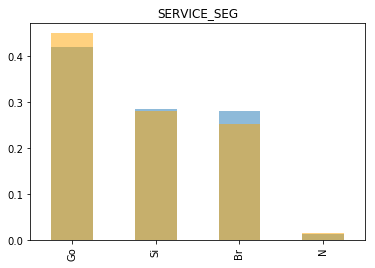

In [76]:
data[(data.FLAG == "NO_TARGET")]['SERVICE_SEG'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, title='SERVICE_SEG')
data[(data.FLAG == "TARGET")]['SERVICE_SEG'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color="orange", title='SERVICE_SEG')

This graph shows us that users who have activated Travel Sure 50 tariff plan are more likely to activate roaming add-on, which is expected, since users pay higher in order to use services for this tariff plan.

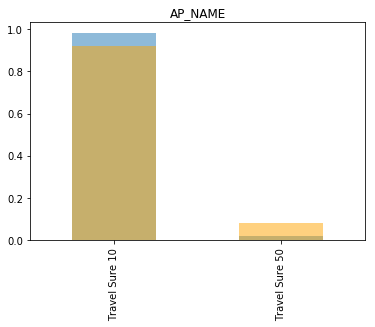

In [77]:
data[(data.FLAG == "NO_TARGET")]['AP_NAME'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, title='AP_NAME')
data[(data.FLAG == "TARGET")]['AP_NAME'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color="orange", title='AP_NAME')

This graph shows us that users who have been in roaming in last 4 months ae more likely to activate roaming add-on in following month. This information makes sense, because users who travel abroad more often are more rational in the sense of traffic usage.

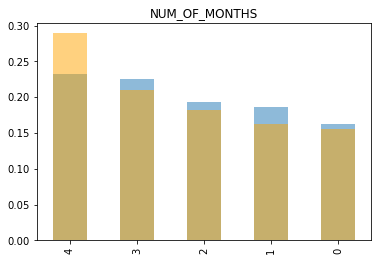

In [78]:
data[(data.FLAG == "NO_TARGET")]['NUM_OF_MONTHS'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, title='NUM_OF_MONTHS')
data[(data.FLAG == "TARGET")]['NUM_OF_MONTHS'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color="orange", title='NUM_OF_MONTHS')

This graph shows us some nice information on how fixed monthly fee (in-tariff bundle) that users pay, clearly separates takers and no_takers. We clearly see that users who pay higher then 1000 price units (p.u.) are more likely to buy the add-on.  

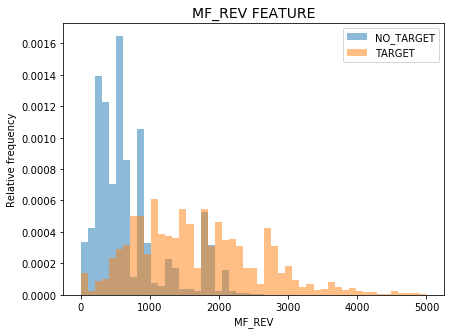

In [69]:
from matplotlib import pyplot

bins = np.linspace(0,5000)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['MF_REV'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['MF_REV'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('MF_REV FEATURE', fontsize = 14)
ax.set_xlabel("MF_REV")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how revenue over the bundle separates takers and no_takers. We clearly see that users who pay higher then 500 price units (p.u.) are more likely to buy the add-on.

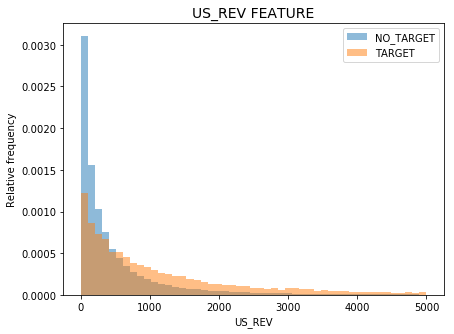

In [68]:
from matplotlib import pyplot

bins = np.linspace(0,5000)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['US_REV'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['US_REV'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('US_REV FEATURE', fontsize = 14)
ax.set_xlabel("US_REV")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how roaming usage (SMS + VOICE + GPRS_MB) separates takers and no_takers. We clearly see that users who use more than 10 units are more likely to buy the add-on.

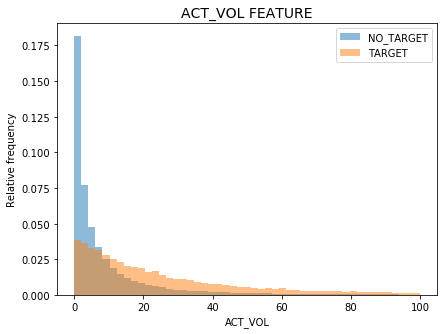

In [67]:
from matplotlib import pyplot

bins = np.linspace(0,100)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['ACT_VOL'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['ACT_VOL'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('ACT_VOL FEATURE', fontsize = 14)
ax.set_xlabel("ACT_VOL")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how roaming revenue (SMS + VOICE + GPRS_MB) separates takers and no_takers. We see that users who spend more than 250 price units are more likely to buy the add-on.

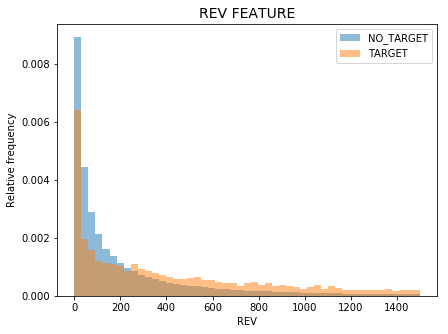

In [70]:
from matplotlib import pyplot

bins = np.linspace(0,1500)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['REV'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['REV'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('REV FEATURE', fontsize = 14)
ax.set_xlabel("REV")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how internet usage within national network separates takers and no_takers. We see that users who use more than 180 MB are more likely to buy the add-on.

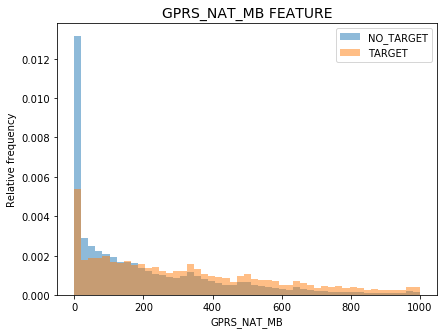

In [71]:
from matplotlib import pyplot

bins = np.linspace(0,1000)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['GPRS_NAT_MB'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['GPRS_NAT_MB'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('GPRS_NAT_MB FEATURE', fontsize = 14)
ax.set_xlabel("GPRS_NAT_MB")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how voice vpn usage within national network separates takers and no_takers. We see that users who spend more than 25 minutes are more likely to buy the add-on.

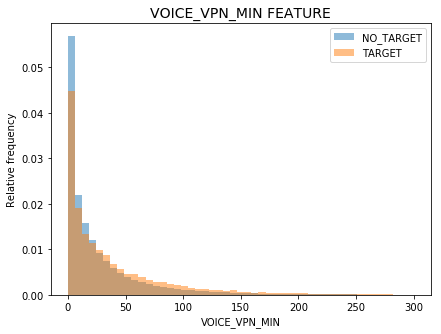

In [72]:
from matplotlib import pyplot

bins = np.linspace(0,300)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['VOICE_VPN_MIN'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['VOICE_VPN_MIN'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('VOICE_VPN_MIN FEATURE', fontsize = 14)
ax.set_xlabel("VOICE_VPN_MIN")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how voice usage within Telenor network separates takers and no_takers. We see that users who spend more than 25 minutes are more likely to buy the add-on.

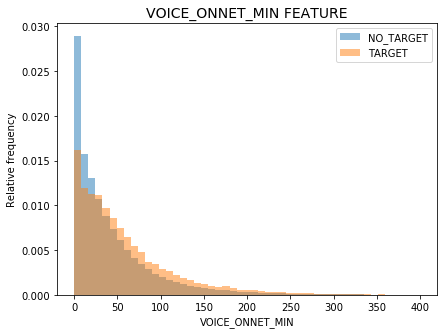

In [73]:
from matplotlib import pyplot

bins = np.linspace(0,400)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['VOICE_ONNET_MIN'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['VOICE_ONNET_MIN'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('VOICE_ONNET_MIN FEATURE', fontsize = 14)
ax.set_xlabel("VOICE_ONNET_MIN")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how voice usage outside Telenor network separates takers and no_takers. We see that users who spend more than 40 minutes are more likely to buy the add-on.

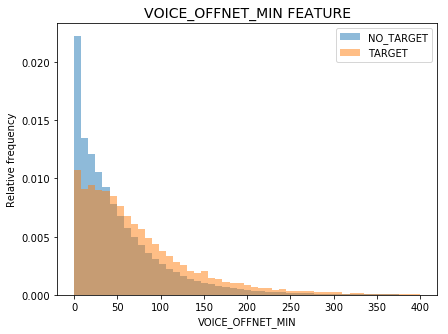

In [74]:
from matplotlib import pyplot

bins = np.linspace(0,400)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['VOICE_OFFNET_MIN'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['VOICE_OFFNET_MIN'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('VOICE_OFFNET_MIN FEATURE', fontsize = 14)
ax.set_xlabel("VOICE_OFFNET_MIN")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how voice usage towards international network, from national network, separates takers and no_takers. We see that users who spend more than 0 minutes are more likely to buy the add-on. This feature obviously doees not clearly separates takers from no_takers.

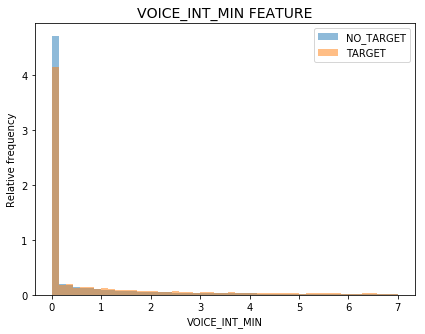

In [75]:
from matplotlib import pyplot

bins = np.linspace(0,7)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['VOICE_INT_MIN'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['VOICE_INT_MIN'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('VOICE_INT_MIN FEATURE', fontsize = 14)
ax.set_xlabel("VOICE_INT_MIN")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how number of sent SMS messages within national network separates takers and no_takers. We see that users who send more than 25 messages are more likely to buy the add-on.

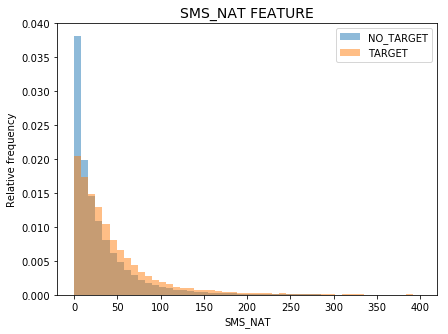

In [76]:
from matplotlib import pyplot

bins = np.linspace(0,400)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['SMS_NAT'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['SMS_NAT'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('SMS_NAT FEATURE', fontsize = 14)
ax.set_xlabel("SMS_NAT")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

This graph shows us how number of SMS messages sent towards international network, from national network, separates takers and no_takers. We see that users who send more than 0 messages are more likely to buy the add-on. This feature obviously doees not clearly separates takers from no_takers.

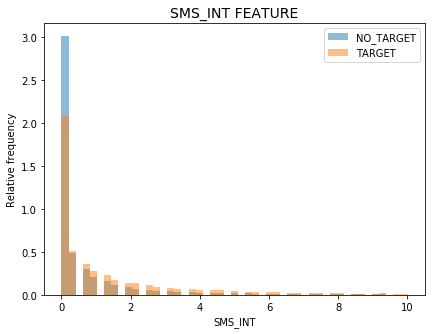

In [77]:
from matplotlib import pyplot

bins = np.linspace(0,10)

fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data[(data.FLAG == "NO_TARGET")]['SMS_INT'], bins, alpha=0.5, label='NO_TARGET', normed=True)
ax.hist(data[(data.FLAG == "TARGET")]['SMS_INT'], bins, alpha=0.5, label='TARGET',normed=True)
ax.set_title('SMS_INT FEATURE', fontsize = 14)
ax.set_xlabel("SMS_INT")
ax.set_ylabel("Relative frequency")
ax.legend(loc='upper right')

Buliding naive predictor

From features listed above, naive predictor can be built in order to attempt to classify users in one of two groups: takers and no_takers. Regarding the features that will be used, MF_REV, US_REV, ACT_VOL and REV could be considered as predictor variables.

MF_REV  > 1000
US_REV  >  500
ACT_VOL >   10
REV     >  250

In [6]:
#Define naive test set range
start_naive_dt  = dt.datetime.strptime("2017-04-01", '%Y-%m-%d').date()
end_naive_dt    = dt.datetime.strptime("2017-07-01", '%Y-%m-%d').date()

In [7]:
naive_test_set = pd.DataFrame(data[(data['TIME_ID'] >= start_naive_dt) & (data['TIME_ID'] <= end_naive_dt)])

In [8]:
naive_test_set['NAIVE_PRED']='NO_TARGET'

In [9]:
naive_test_set.loc[naive_test_set['MF_REV'] > 1000, ['NAIVE_PRED']] = 'TARGET'
fn.naive_predictor(naive_test_set)

TP=3306.0
FP=16947.0
FN=971.0
TN=79981.0
Precision=0.163235076285
Recall=0.772971709142
Naive Predictor: [Accuracy score: 0.8230, F-score: 0.4424]


In [10]:
naive_test_set.loc[naive_test_set['US_REV'] > 500, ['NAIVE_PRED']] = 'TARGET'
fn.naive_predictor(naive_test_set)

TP=3743.0
FP=37017.0
FN=534.0
TN=59911.0
Precision=0.0918302257115
Recall=0.875146130465
Naive Predictor: [Accuracy score: 0.6290, F-score: 0.3234]


In [11]:
naive_test_set.loc[naive_test_set['ACT_VOL'] > 10, ['NAIVE_PRED']] = 'TARGET'
fn.naive_predictor(naive_test_set)

TP=3930.0
FP=42934.0
FN=347.0
TN=53994.0
Precision=0.0838596790714
Recall=0.918868365677
Naive Predictor: [Accuracy score: 0.5723, F-score: 0.3072]


In [12]:
naive_test_set.loc[naive_test_set['REV'] > 250, ['NAIVE_PRED']] = 'TARGET'
fn.naive_predictor(naive_test_set)

TP=3990.0
FP=47881.0
FN=287.0
TN=49047.0
Precision=0.0769215939542
Recall=0.932896890344
Naive Predictor: [Accuracy score: 0.5241, F-score: 0.2892]


After each feature was added, accuracy and F-score were dropping down:

MF_REV - Accuracy score: 0.8230, F-score: 0.4424

US_REV - Accuracy score: 0.6290, F-score: 0.3234

ACT_VOL - Accuracy score: 0.6290, F-score: 0.3234

REV - Accuracy score: 0.5241, F-score: 0.2892


The reason of this drop is mainly because of increasing of FP value in confusion matrix. The naive algorithm has really nice recall rate of 0.933 which means naive algorithm recognizes 93.3% of actual takers of roaming add-on. On the other hand, precision rate of this algorithm is 0.07  which means naive algorithm has recognized only 7% of actual no_takers of roaming addon. This small precision rate could make sense and potential benefit, if we consider the FP set as our potential target customers. These users clearly share common behaviour with customers that activate the add-on service. This list of users could be used for targeting purposes.

Can machine learning algorithm outperform this naive predictor? In the next sections, data preprocessing will be done and three machine learning models will be created. Models will be trained with different sizes of train set, and tested on the same set our naive predictor was tested. The goal is to gain better accuracy (>0.8230) and F2 score(>0.4424), in order to outperform naive predictor.

In order to transform skewed continous features, log-transform will be used.
In following section, list of skewed features is shown.

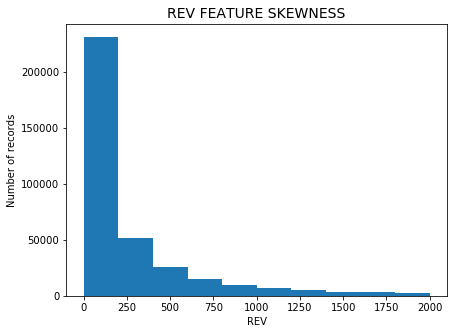

In [79]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['REV'],range=[0, 2000])
ax.set_title('REV FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("REV")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

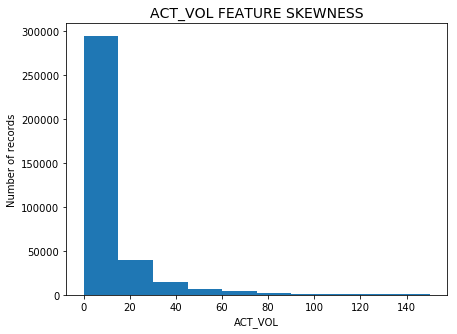

In [80]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['ACT_VOL'],range=[0, 150])
ax.set_title('ACT_VOL FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("ACT_VOL")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

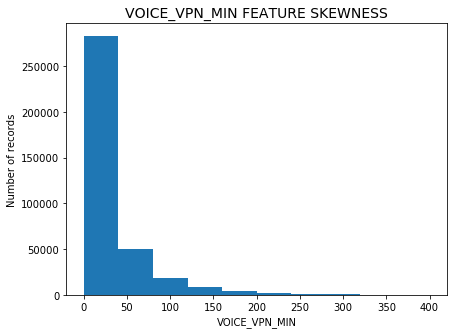

In [81]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['VOICE_VPN_MIN'],range=[0, 400])
ax.set_title('VOICE_VPN_MIN FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("VOICE_VPN_MIN")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

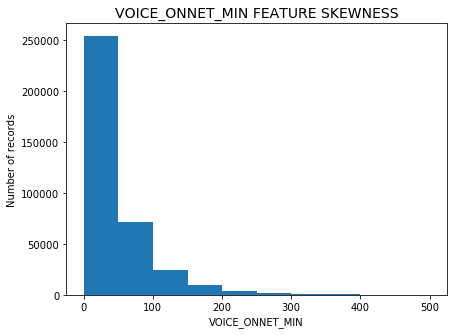

In [82]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['VOICE_ONNET_MIN'],range=[0, 500])
ax.set_title('VOICE_ONNET_MIN FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("VOICE_ONNET_MIN")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

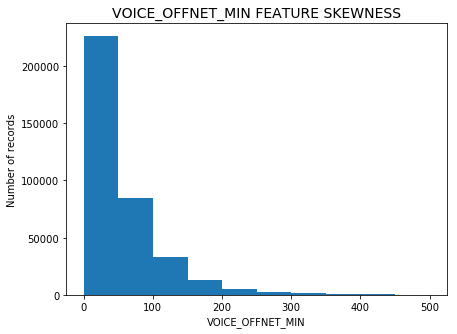

In [84]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['VOICE_OFFNET_MIN'],range=[0, 500])
ax.set_title('VOICE_OFFNET_MIN FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("VOICE_OFFNET_MIN")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

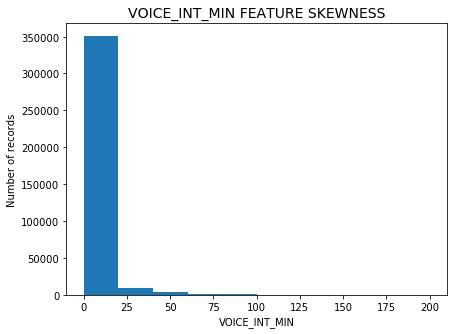

In [85]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['VOICE_INT_MIN'],range=[0, 200])
ax.set_title('VOICE_INT_MIN FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("VOICE_INT_MIN")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

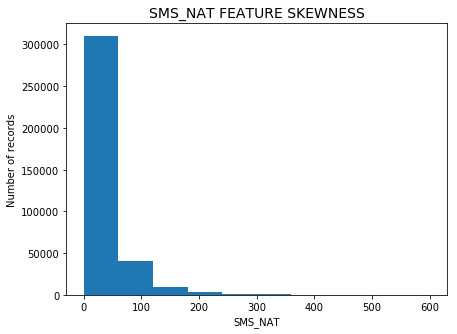

In [86]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['SMS_NAT'],range=[0, 600])
ax.set_title('SMS_NAT FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("SMS_NAT")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

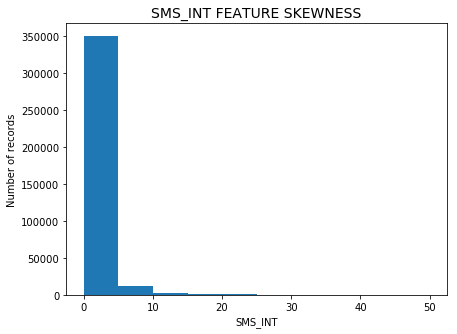

In [87]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['SMS_INT'],range=[0, 50])
ax.set_title('SMS_INT FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("SMS_INT")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

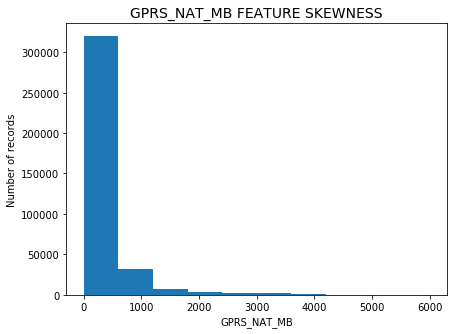

In [88]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['GPRS_NAT_MB'],range=[0, 6000])
ax.set_title('GPRS_NAT_MB FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("GPRS_NAT_MB")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

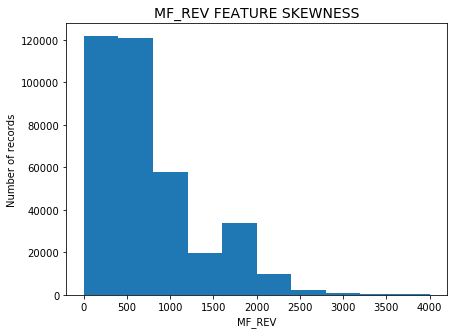

In [89]:
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['MF_REV'],range=[0, 4000])
ax.set_title('MF_REV FEATURE SKEWNESS', fontsize = 14)
ax.set_xlabel("MF_REV")
ax.set_ylabel("Number of records")
#ax.legend(loc='upper right')

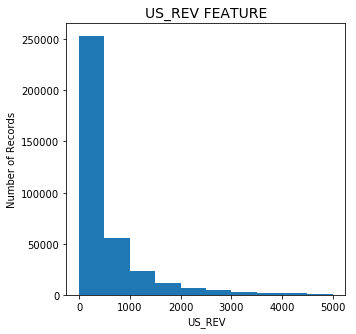

In [90]:
fig = plt.figure(figsize = (11,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['US_REV'],range=[0, 5000])
ax.set_title('US_REV FEATURE', fontsize = 14)
ax.set_xlabel("US_REV")
ax.set_ylabel("Number of Records")

All of those features need to be properly scaled and centered. To do this, we need to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers.

In [4]:
#Continous features that needs to be transformed
pre_proc = ['REV',
          'ACT_VOL',
          "VOICE_VPN_MIN", 
          "VOICE_ONNET_MIN", 
          "VOICE_OFFNET_MIN", 
          "VOICE_INT_MIN",         
          "SMS_NAT",
          "SMS_INT",
          "GPRS_NAT_MB",
          "MF_REV",
          "US_REV"]

In [5]:
# Log-transform the skewed features
# np.log(x + 1) Value 1 is added to x to ensure log(0) will never be calculated, when x=0, since it would generate infinite value of that function
data[pre_proc] = data[pre_proc].apply(lambda x: np.log(x + 1))

In order to supervised learner treat every continous feature equally, normalization of features needs to be done. Data will preserve its shape, but will be scaled to range [0, 1].

In [6]:
# Normalize contious features between [0, 1]
scaler = MinMaxScaler()
data[pre_proc] = scaler.fit_transform(data[pre_proc])

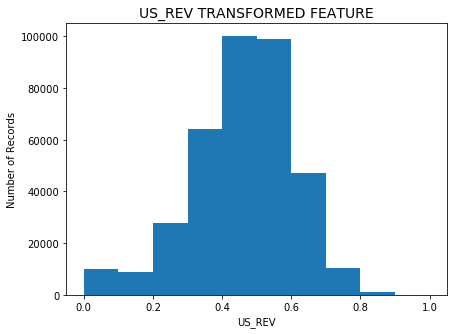

In [101]:
#Example of transformed and normalized feature
fig = plt.figure(figsize = (15,5));
ax = fig.add_subplot(1, 2, 1+1)
ax.hist(data['US_REV'],range=[0, 1])
ax.set_title('US_REV TRANSFORMED FEATURE', fontsize = 14)
ax.set_xlabel("US_REV")
ax.set_ylabel("Number of Records")

In [95]:
# Show an example of a record with scaling applied
display(data.head(n = 1))

,TIME_ID,SERVICE_SEG,AP_NAME,ACT_MONTH,ACT_VOL,REV,NUM_OF_MONTHS,VOICE_VPN_MIN,VOICE_ONNET_MIN,VOICE_OFFNET_MIN,VOICE_INT_MIN,SMS_NAT,SMS_INT,GPRS_NAT_MB,MF_REV,US_REV,OS,FLAG,SUBSCRIPTION_ID
1,2017-07-01,Si,Travel Sure 10,7,0.587338,0.586801,2,0.554766,0.68061,0.763761,0.114316,0.548036,0.226661,0.785785,0.668983,0.619009,iPhone,NO_TARGET,2907


In [7]:
# Encode labels to {0,1}
data['FLAG'] = data['FLAG'].replace(["NO_TARGET","TARGET"],[0,1])
data['FLAG'] = data['FLAG'].astype(int)

Some categorical features are present in this dataset. Since learning algorithms are most suitable with numerical data, these categorical variables needs to be transformed to dummy, One-Hot encoded variables, where each variable possibe value will represent one column in dataset.

In [8]:
# Perform One-Hot Encoding to categorical variables
data = fn.encode_features(data)

# Show an example of a record with One-Hot Encoding applied
display(data.head(n = 1))

39 total features after one-hot encoding.


,ACT_VOL,REV,NUM_OF_MONTHS,VOICE_VPN_MIN,VOICE_ONNET_MIN,VOICE_OFFNET_MIN,VOICE_INT_MIN,SMS_NAT,SMS_INT,GPRS_NAT_MB,...,ACT_MONTH_7,ACT_MONTH_8,ACT_MONTH_9,OS_Android,OS_BlackBerry,OS_Proprietary,OS_Windows,OS_iPhone,TIME_ID,FLAG
1,0.587338,0.586801,2,0.554766,0.68061,0.763761,0.114316,0.548036,0.226661,0.785785,...,1,0,0,0,0,0,0,1,2017-07-01,0


In the next step, training and testing sets will be splitted. Models will be trained on 12 months of data and tested on four months of testing data.

In [9]:
#Define train and test set ranges
start_train_dt = dt.datetime.strptime("2016-04-01", '%Y-%m-%d').date()
end_train_dt   = dt.datetime.strptime("2017-03-01", '%Y-%m-%d').date()

start_test_dt  = dt.datetime.strptime("2017-04-01", '%Y-%m-%d').date()
end_test_dt    = dt.datetime.strptime("2017-07-01", '%Y-%m-%d').date()

In [10]:
# Preprocess training set 
train_set = data[(data['TIME_ID'] >= start_train_dt) & (data['TIME_ID'] <= end_train_dt)]
test_set  = data[(data['TIME_ID'] >= start_test_dt)  & (data['TIME_ID'] <= end_test_dt)]

In [22]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=100)
clf_C = GradientBoostingClassifier(random_state=100)

# Calculate the number of samples for 10%, 50%, and 100% of the training data
# Only one class (NO_TARGET) will be randomly downscaled to selected percent of data.
# This process is done for two reasons:
# 1) In order to balance NO_TARGET and TARGET classes to maximum 50/50 ratio
# 2) In order to reduce dataset for training performance reasons. 
# Some training parameters will require more processing power, so smaller dataset will help learner to train faster

samples_frac_1 = int(10)
samples_frac_2 = int(50)
samples_frac_3 = int(100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_frac_1, samples_frac_2, samples_frac_3]):
        results[clf_name][i] = \
        fn.train_predict(clf, samples, train_set, test_set)

GaussianNB trained on 10 % of dataset with 36121 samples.
tn=94229.0, fp=2699.0, fn=3613.0, tp=664.0, precision=0.197442759441, recall=0.155249006313, accuracy=0.937631539944, fscore=0.162180645792.
GaussianNB trained on 50 % of dataset with 138587 samples.
tn=94555.0, fp=2373.0, fn=3727.0, tp=550.0, precision=0.188162846391, recall=0.128594809446, accuracy=0.939726298108, fscore=0.137287204833.
GaussianNB trained on 100 % of dataset with 266664 samples.
tn=94645.0, fp=2283.0, fn=3755.0, tp=522.0, precision=0.186096256684, recall=0.122048164601, accuracy=0.940338916061, fscore=0.131070155175.
RandomForestClassifier trained on 10 % of dataset with 36121 samples.
tn=89808.0, fp=7120.0, fn=1422.0, tp=2855.0, precision=0.286215538847, recall=0.667523965396, accuracy=0.915597055481, fscore=0.527083410257.
RandomForestClassifier trained on 50 % of dataset with 138587 samples.
tn=96027.0, fp=901.0, fn=2489.0, tp=1788.0, precision=0.66493120119, recall=0.418050035071, accuracy=0.966503631244, 

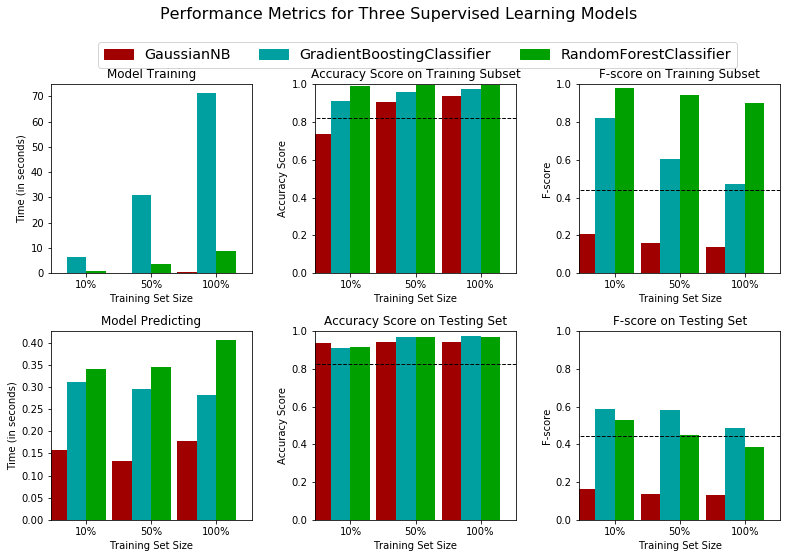

In [25]:
# Run metrics visualization for the three supervised learning models chosen compared to naive predictor
vs.evaluate(results,0.8230,0.4424)

From graph above, we see that Gradient Boosting algorithm outperformed Random Forest and Gaussian Naive Bayes algorithms considering F2-Score on testing set.
Comparing to other two models, GBM was trained longest. When trained data (30000 samples) were used for testing, Random classifier gave the highest accuracy and F-score comparing to other two models.

Comparing to naive predictor model (Accuracy score: 0.8230, F-score: 0.4424), Gradient Boosting model has performed better (Accuracy score: 0.9688, F-score: 0.5902).

In [11]:
train_set = fn.generate_train_set(data, start_train_dt, end_train_dt, .1)

Initial size of no_target class: 256159
Downscaled size of no_target class: 25616
Target class size: 10505


In [13]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score, recall_score, precision_score

In [30]:
# Initialize the classifier
gbc = GradientBoostingClassifier(random_state=100)

# Create the parameters list you wish to tune
parameters = dict(n_estimators=[100,150],
                  learning_rate=[0.1, 0.01, 0.001, 0.0001],
                  max_depth=[4,6,10,12])

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=2)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(gbc, param_grid = parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(train_set[1], train_set[2])

# Get the estimator
best_clf = grid_fit.best_estimator_

test_set_features  = test_set.drop(['FLAG', 'TIME_ID', 'SUBSCRIPTION_ID'], axis = 1)
test_set_labels    = test_set['FLAG']

# Make predictions using the unoptimized and optimized model
predictions = (gbc.fit(train_set[1], train_set[2])).predict(test_set_features)
best_predictions = best_clf.predict(test_set_features)

In [31]:
# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(test_set_labels, predictions)) 
print "Precision score on testing data: {:.4f}".format(precision_score(test_set_labels, predictions))
print "Recall score on testing data: {:.4f}".format(recall_score(test_set_labels, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(test_set_labels, predictions, beta = 2))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(test_set_labels, best_predictions))
print "Final Precision score on the testing data: {:.4f}".format(precision_score(test_set_labels, best_predictions))
print "Final Recall score on the testing data: {:.4f}".format(recall_score(test_set_labels, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(test_set_labels, best_predictions, beta = 2))

Unoptimized model
------
Accuracy score on testing data: 0.9123
Precision score on testing data: 0.2999
Recall score on testing data: 0.8048
F-score on testing data: 0.6020

Optimized Model
------
Final accuracy score on the testing data: 0.9368
Final Precision score on the testing data: 0.3842
Final Recall score on the testing data: 0.8230
Final F-score on the testing data: 0.6700


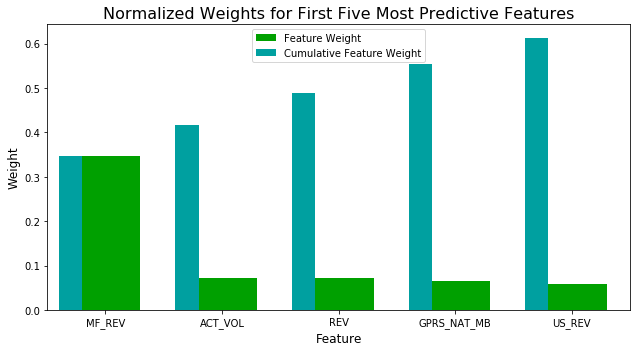

In [32]:
# Extract the feature importances
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, train_set[1], train_set[2])

In [33]:
test_sets = fn.generate_test_sets(data, start_test_dt, end_test_dt)

In [34]:
test_1 = fn.test_predict(1, best_clf, test_sets[1], test_sets[2], test_sets[3])
test_2 = fn.test_predict(2, best_clf, test_sets[1], test_sets[2], test_sets[3])
test_3 = fn.test_predict(3, best_clf, test_sets[1], test_sets[2], test_sets[3])
test_4 = fn.test_predict(4, best_clf, test_sets[1], test_sets[2], test_sets[3])

TP=610.0
FP=1819.0
FN=234.0
TN=18305.0
Precision=0.251132153149
Recall=0.722748815166
ML Predictor: [Accuracy score: 0.9021, F-score: 0.5254]
TP=726.0
FP=892.0
FN=162.0
TN=19731.0
Precision=0.44870210136
Recall=0.817567567568
ML Predictor: [Accuracy score: 0.9510, F-score: 0.7021]
TP=913.0
FP=1146.0
FN=174.0
TN=22785.0
Precision=0.443419135503
Recall=0.839926402944
ML Predictor: [Accuracy score: 0.9472, F-score: 0.7125]
TP=1271.0
FP=1784.0
FN=187.0
TN=30466.0
Precision=0.416039279869
Recall=0.871742112483
ML Predictor: [Accuracy score: 0.9415, F-score: 0.7151]


Total number of targeted users: 			1819
Total number of roaming users in targeted month: 	21511
Total number of correctly targeted roaming users: 	1312
Correctly targeted roaming users rate: 			72.1275426058%
Total number of activations: 				74
Take rate: 						5.64024390244%


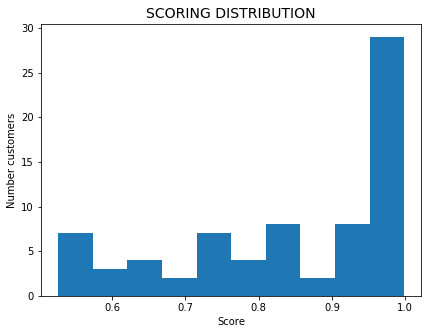

In [35]:
fn.campaign_simulation(target_data = test_1, activations_data = test_2, act_class = 0, pred_class = 1, score_treshold = 0.5)

Total number of targeted users: 			610
Total number of roaming users in targeted month: 	21511
Total number of correctly targeted roaming users: 	440
Correctly targeted roaming users rate: 			72.131147541%
Total number of activations: 				238
Take rate: 						54.0909090909%


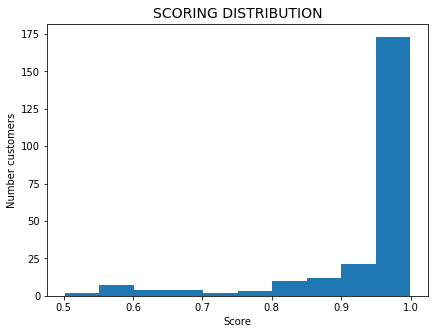

In [36]:
fn.campaign_simulation(target_data = test_1, activations_data = test_2, act_class = 1, pred_class = 1, score_treshold = 0.5)

Total number of targeted users: 			892
Total number of roaming users in targeted month: 	25018
Total number of correctly targeted roaming users: 	589
Correctly targeted roaming users rate: 			66.0313901345%
Total number of activations: 				53
Take rate: 						8.99830220713%


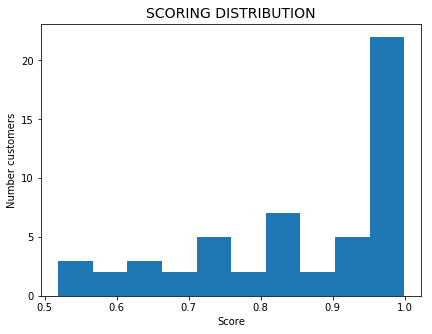

In [37]:
fn.campaign_simulation(target_data = test_2, activations_data = test_3, act_class = 0, pred_class = 1, score_treshold = 0.5)

Total number of targeted users: 			726
Total number of roaming users in targeted month: 	25018
Total number of correctly targeted roaming users: 	509
Correctly targeted roaming users rate: 			70.1101928375%
Total number of activations: 				285
Take rate: 						55.9921414538%


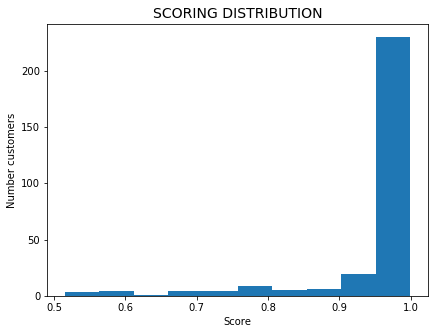

In [38]:
fn.campaign_simulation(target_data = test_2, activations_data = test_3, act_class = 1, pred_class = 1, score_treshold = 0.5)

Total number of targeted users: 			1146
Total number of roaming users in targeted month: 	33708
Total number of correctly targeted roaming users: 	857
Correctly targeted roaming users rate: 			74.7818499127%
Total number of activations: 				59
Take rate: 						6.88448074679%


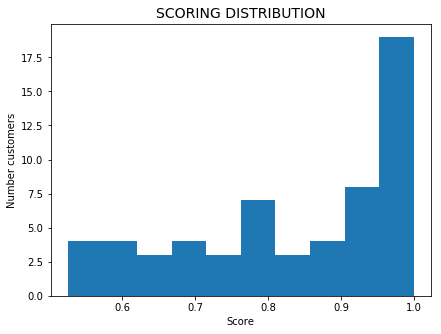

In [39]:
fn.campaign_simulation(target_data = test_3, activations_data = test_4, act_class = 0, pred_class = 1, score_treshold = 0.5)

Total number of targeted users: 			913
Total number of roaming users in targeted month: 	33708
Total number of correctly targeted roaming users: 	707
Correctly targeted roaming users rate: 			77.4370208105%
Total number of activations: 				354
Take rate: 						50.0707213579%


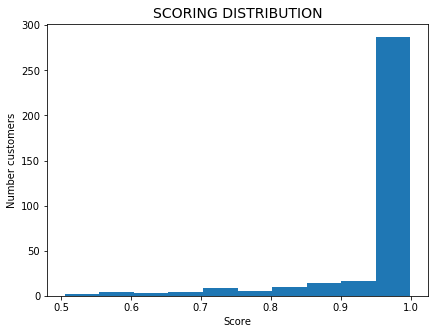

In [40]:
fn.campaign_simulation(target_data = test_3, activations_data = test_4, act_class = 1, pred_class = 1, score_treshold = 0.5)